# DSAP 107

In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.dpi'] = 130

### 讀取資料

In [2]:
grades = pd.read_csv('../../data/DSAP107 grades.csv')
v_info = pd.read_excel('../../data/DSAP107 videos_sep.xlsx', sheet_name = 'video info')
records = pd.read_excel('../../data/DSAP107 videos_sep.xlsx', sheet_name = 'watching records')
student_id = pd.read_excel('../../data/DSAP107 videos_sep.xlsx', sheet_name = 'student id')

In [3]:
grades

,student_id,Section,Homework 0 (1554),Homework 1 (1475),Homework 2 (1750),Homework 3 (1808),Homework 4 (1859),Homework 5 (1954),Homework 6 (2053),Homework 7 (2129),Homework8 (2232),Quiz (1582),Midterm (2042),Final (2346)
0,Points Possible,NaN,100,100,100,100,100,100,100,100,100,100.0,0,100.0
1,64,107-2 資料結構與進階程式設計,0,0,0,0,0,0,0,0,0,NaN,0,0.0
2,65,107-2 資料結構與進階程式設計,14,0,0,0,0,0,0,0,0,NaN,0,0.0
3,66,107-2 資料結構與進階程式設計,88,39,96,104,69,98,54,54,96,NaN,82,76.0
4,67,107-2 資料結構與進階程式設計,99,95,46,92,32,42,53,97,97,NaN,79,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,164,107-2 資料結構與進階程式設計,100,59,65,88,82,94,98,91,97,NaN,0,88.0
102,165,107-2 資料結構與進階程式設計,91,98,96,110,82,96,81,89,96,NaN,0,55.0
103,166,107-2 資料結構與進階程式設計,100,60,100,115,111,98,98,96,92,NaN,90,76.0
104,167,107-2 資料結構與進階程式設計,91,100,99,112,97,98,120,92,97,NaN,91,54.0


### 其中、期末成績

In [4]:
# 開一個 table 存等一下計算的資料
student_info = pd.DataFrame(data = grades.drop(0)['student_id'])

student_info['midterm'] = grades['Midterm (2042)']
student_info['final'] = grades['Final (2346)']

### 觀看時間、觀看速度、平均觀看次數

In [5]:
### 觀看時間、觀看速度、平均觀看次數


# 計算總觀看時間
total_spent_time = [] # 總觀看時間
total_watch_video_time = [] # 觀看的總影片時間

for i in student_info['student_id']:
    watch_record_i = records[records['student_id'] == int(i)]
    # 抓出有在看的資料
    real_watch_i = watch_record_i[(watch_record_i['end'] > watch_record_i['start']) & (watch_record_i['playback_rate'] != 0)]
    video_time_i = real_watch_i['end'] - real_watch_i['start']# 觀看紀錄 的 影片時間(end - start)
    total_watch_video_time.append(sum(video_time_i))
    total_spent_time.append(sum(video_time_i/real_watch_i['playback_rate']))

student_info['total_watch_time'] = total_spent_time

# 計算撥放速度
total_spent_time = [x if x!= 0 else 1 for x in total_spent_time]
avg_playback_rate = [i/j for (i,j) in zip(total_watch_video_time, total_spent_time)]
student_info['avg_playback_rate'] = avg_playback_rate

# 計算影片平均觀看次數
length_l = list(v_info['meta'])# length of each lecture
length_l = [int(i.split('n=>')[1].split('}')[0]) for i in length_l]
total_length_l = sum(length_l)
student_info['avg_freq'] = student_info['total_watch_time']/(total_length_l/student_info['avg_playback_rate'])


### 拖曳次數、拖曳時間長度

In [6]:
forward_sec = []
backward_sec =[]
forward_times = []
backward_times =[]

# backwards
backward_records = records[(records['start'] > records['end']) & (records['playback_rate'] ==0)]
for i in student_info['student_id']:
    backward_records_i = backward_records[backward_records['student_id'] == int(i)]
    backward_times.append(len(backward_records_i))
    backward_sec.append(sum(backward_records_i['start'] - backward_records_i['end']))
    

# forwards
forward_records = records[(records['start'] < records['end']) & (records['playback_rate'] ==0)]
for i in student_info['student_id']:
    forward_records_i = forward_records[forward_records['student_id'] == int(i)]
    #display(forward_records_i)
    forward_times.append(len(forward_records_i))
    forward_sec.append(sum(forward_records_i['end'] - forward_records_i['start']))
    
    
student_info['backward_sec'] = backward_sec
student_info['backward_times'] = backward_times
student_info['forward_sec'] = forward_sec
student_info['forward_times'] = forward_times

In [7]:
student_info

,student_id,midterm,final,total_watch_time,avg_playback_rate,avg_freq,backward_sec,backward_times,forward_sec,forward_times
1,64,0,0.0,13331.983333,1.492651,0.563979,555,27,1517,10
2,65,0,0.0,3572.000000,1.000000,0.101233,97,9,442,9
3,66,82,76.0,36625.000000,1.000000,1.037976,6718,183,7937,258
4,67,79,79.0,18789.383333,1.847426,0.983761,6466,120,6789,163
5,68,52,57.0,13719.766667,1.742595,0.677568,3991,93,6939,196
...,...,...,...,...,...,...,...,...,...,...
101,164,0,88.0,28647.200000,1.376958,1.117925,6430,666,5978,347
102,165,0,55.0,6125.250000,1.626709,0.282386,2417,53,4311,61
103,166,90,76.0,18766.033333,1.279866,0.680686,4038,365,2600,103
104,167,91,54.0,17117.583333,1.565057,0.759246,3392,61,2692,39


### Save data

In [8]:
student_info.to_excel('../../data/許哲/DSAP107.xlsx', index = False)

### Regression

In [9]:
data = student_info[student_info['midterm'] != 0]
data

,student_id,midterm,final,total_watch_time,avg_playback_rate,avg_freq,backward_sec,backward_times,forward_sec,forward_times
3,66,82,76.0,36625.000000,1.000000,1.037976,6718,183,7937,258
4,67,79,79.0,18789.383333,1.847426,0.983761,6466,120,6789,163
5,68,52,57.0,13719.766667,1.742595,0.677568,3991,93,6939,196
7,70,71,80.5,31772.600000,1.563360,1.407737,6640,61,2062,71
8,71,98,91.5,12522.250000,1.814291,0.643871,3988,92,11624,112
...,...,...,...,...,...,...,...,...,...,...
96,159,52,65.5,25794.850000,1.530577,1.118917,23597,158,19198,315
100,163,79,84.0,24626.633333,1.448310,1.010826,2303,122,579,64
103,166,90,76.0,18766.033333,1.279866,0.680686,4038,365,2600,103
104,167,91,54.0,17117.583333,1.565057,0.759246,3392,61,2692,39


In [10]:
import statsmodels.formula.api as smf
result = smf.ols('midterm ~ avg_playback_rate + total_watch_time + forward_sec + backward_sec', data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                midterm   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.868
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.128
Time:                        23:05:56   Log-Likelihood:                -261.02
No. Observations:                  63   AIC:                             532.0
Df Residuals:                      58   BIC:                             542.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            37.8474     15.92

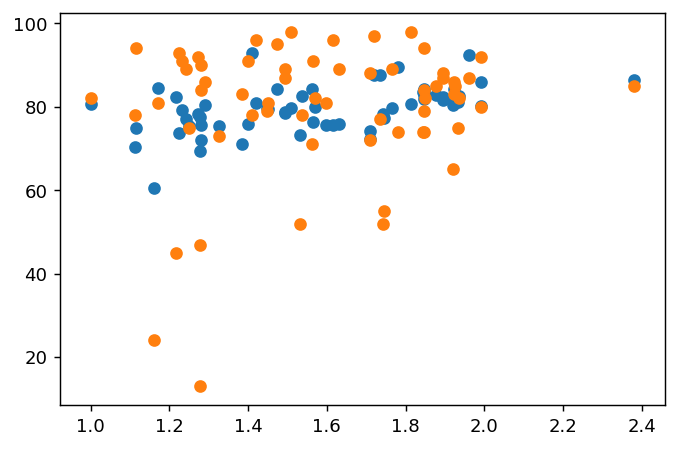

In [11]:
plt.scatter(data['avg_playback_rate'], result.predict())
plt.scatter(data['avg_playback_rate'], data['midterm'])

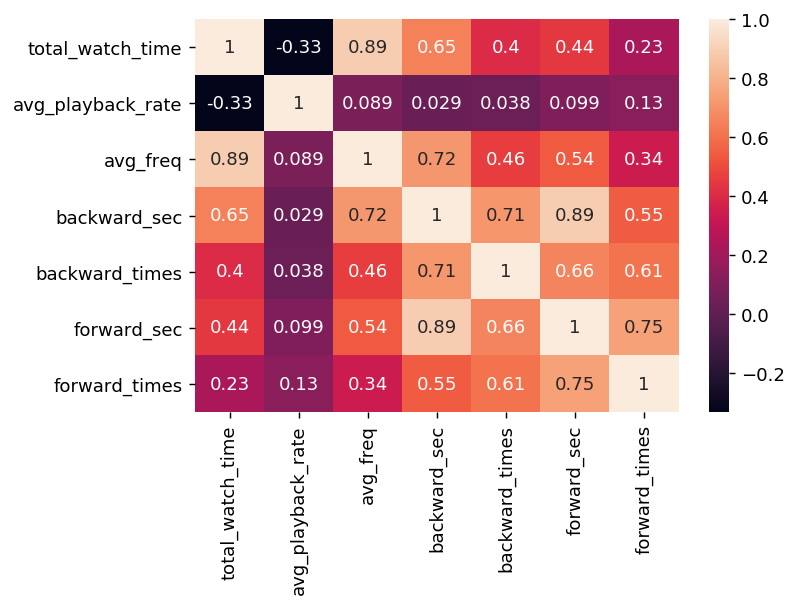

In [12]:
corr = data[["total_watch_time", 'avg_playback_rate','avg_freq','backward_sec', 
             'backward_times', 'forward_sec', 'forward_times']].corr()
sns.heatmap(corr, annot=True)